In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [9]:
df = pd.read_csv("employee.csv")

In [11]:
print(df.head())

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [13]:
# Data Exploration
print("\nData Overview:")
print(df.head())
print("\nColumn Information:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


Data Overview:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None

Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683 

In [15]:
# Unique values in each column
for col in df.columns:
    print(f"\nUnique values in {col}: {df[col].unique()}")
    print(f"Count of unique values: {df[col].nunique()}")


Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count of unique values: 6

Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count of unique values: 29

Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count of unique values: 40

Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count of unique values: 11

Unique values in Country: ['India']
Count of unique values: 1

Unique values in Gender: [0 1]
Count of unique values: 2


In [17]:
# Renaming columns (Example: correcting column names if needed)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [19]:
# Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [21]:
# Replace 0 in 'age' column with NaN
if 'age' in df.columns:
    df['age'].replace(0, np.nan, inplace=True)

C:\Users\Sijoy Joseph\AppData\Local\Temp\ipykernel_15516\1874064931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, np.nan, inplace=True)


In [23]:
# Handling missing values (Replace with mean/median/mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\Sijoy Joseph\AppData\Local\Temp\ipykernel_15516\2461450972.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Sijoy Joseph\AppData\Local\Temp\ipykernel_15516\2461450972.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [25]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [27]:
# Outlier Detection & Removal using IQR
for col in ['age', 'salary']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

In [29]:
# Data Analysis
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]

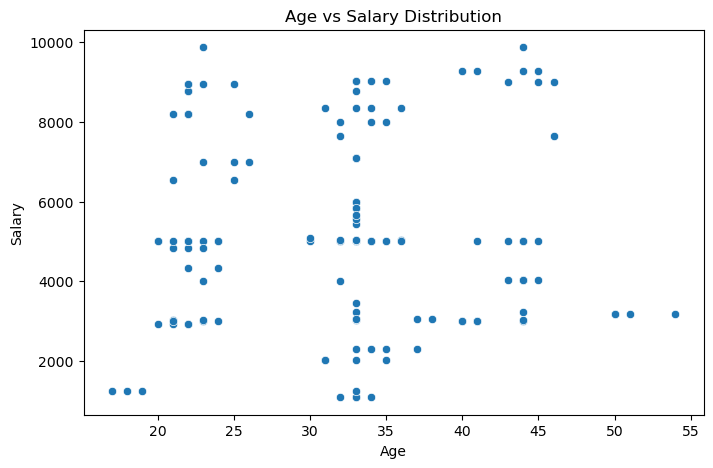

In [61]:
# Plot Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Distribution")
plt.show()

In [63]:
if 'location' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(y=df['location'], order=df['location'].value_counts().index)
    plt.title("Number of People by Location")
    plt.xlabel("Count")
    plt.ylabel("Location")
    plt.show()

In [65]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [67]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [69]:
df = pd.get_dummies(df, drop_first=True)

In [71]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns  # Detect numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [73]:
minmax_scaler = MinMaxScaler()
df[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

print("\nPreprocessing Completed!")


Preprocessing Completed!
